In [1]:
from tensorflow import keras
import cv2
import gradio as gr
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
model = keras.models.load_model("capstone_rgb.h5")

In [3]:
df = pd.read_csv("archive\Test.csv")

In [4]:
wd = os.getcwd() + "\\archive\\"

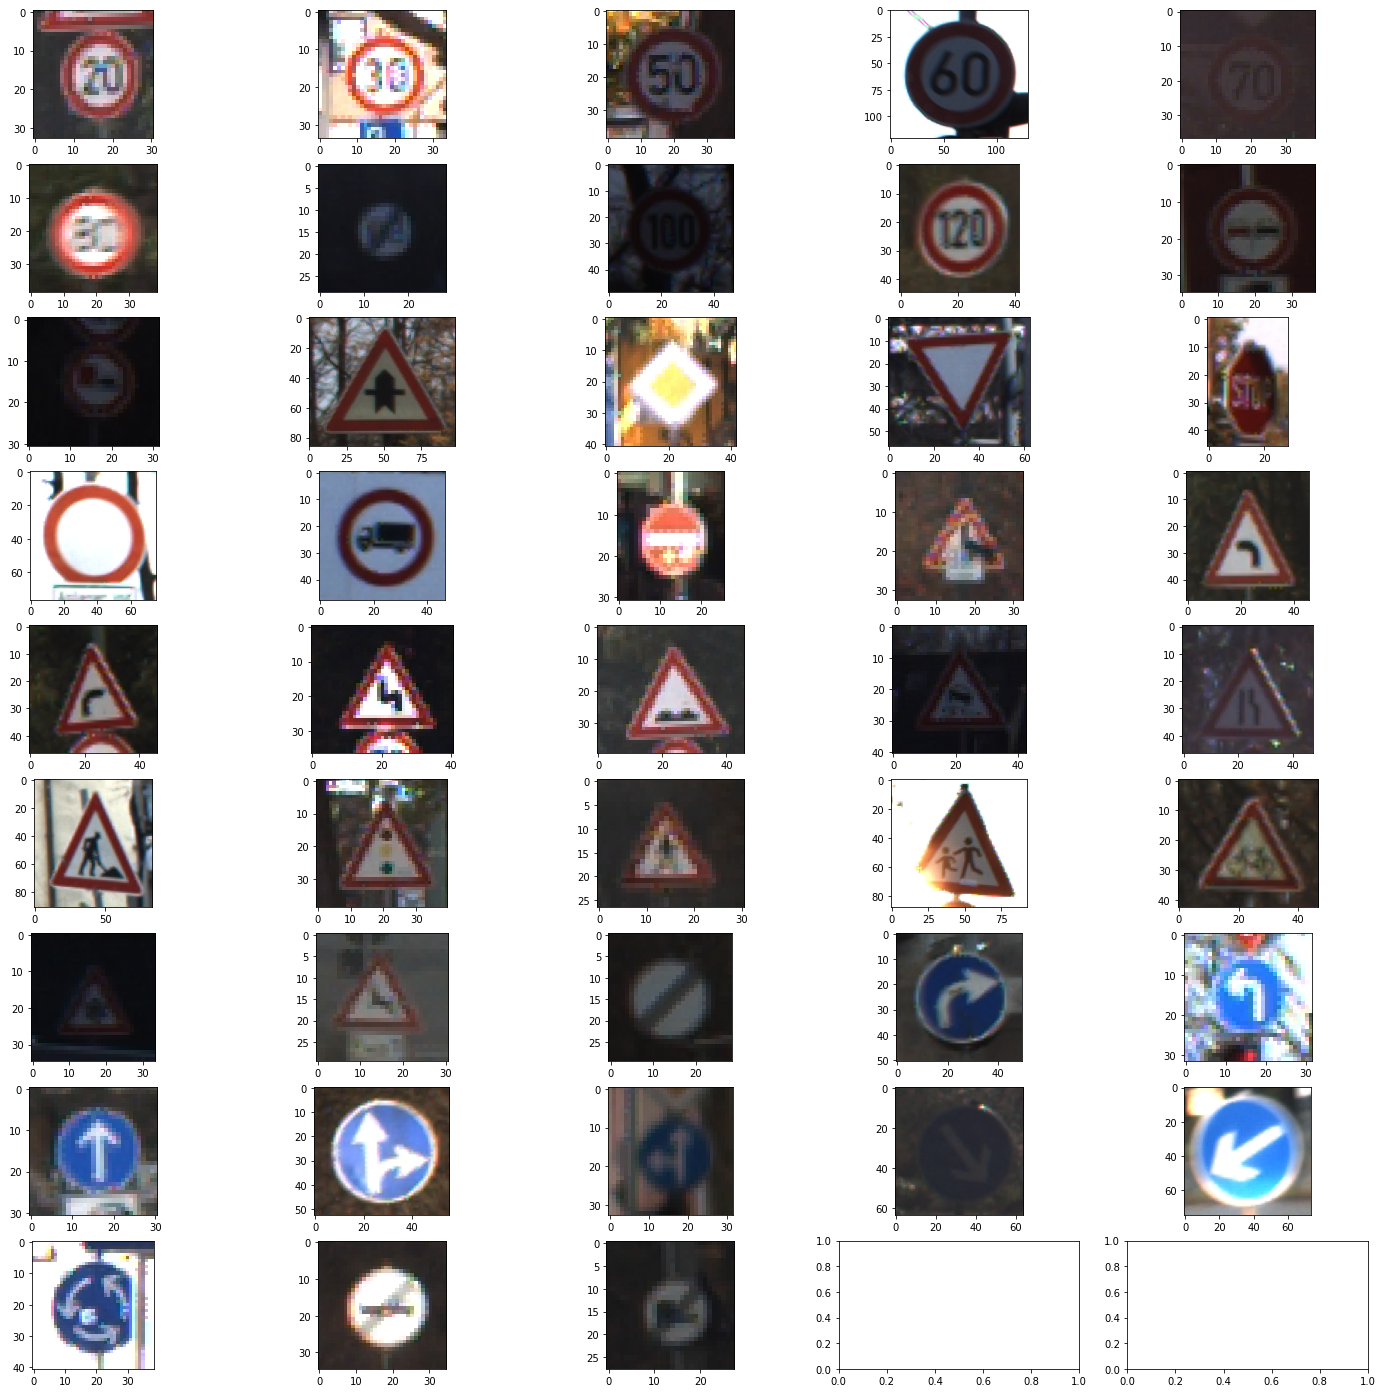

In [5]:
j = -1
fig, ax = plt.subplots(nrows=9,ncols=5,figsize=(25,25))
ax = ax.flatten()
for i,name in enumerate(df.groupby(by="ClassId").last()["Path"]):
    path = wd + name
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    ax[i].imshow(image)

In [6]:
classes= ["speed limit:20","speed limit:30","speed limit:50","speed limit:60","speed limit:70",
          "speed limit:80","en of speed limit:80","speed limit:100","speed limit:120","No Passing",
          "No passing for vehicles over 3,5 tonnes","Priority","Priority road", "Yield", "Stop", "Road closed",
          "Vehicles over 3,5 tonnes prohibited","Do not Enter", "General Danger", "Left Curve", "Right Curve",
          "Double Curve", "Uneven road surface","Slippery when wet or dirty", "Road narrows", "Roadworks",
          "Traffic signals ahead","Pedestrian crossing","Watch for children", "Bicycle crossing", "Ice / snow",
          "Wild animal crossing", "End of all restrictions","Turn right ahead", "Turn left ahead", "Ahead only",
          "Ahead or turn right only", "Ahead or turn left only","Pass by on right", "Pass by on left", "Roundabout",
          "End of no passing zone","End of no passing zone for trucks"]

In [7]:
def predict(image):
    #image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    image = cv2.resize(image, (50,50))
    image = np.reshape(image, (-1,50,50,3))
    predindex=np.argmax(model.predict(image))
    return classes[predindex]

In [8]:
image = gr.components.Image(shape=(50,50))
label = gr.components.Label(num_top_classes=1)

In [ ]:
gr.Interface(fn=predict, inputs=image, outputs=label).launch(debug=True)

Running on local URL:  http://127.0.0.1:7860/
Running on public URL: https://23518.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces


1/1 [==============================] - 2s 2s/step
